# CIGO Data scientist Challenge

## Motivación 

Somos un centro de Transformación Digital Interna que busca de manera innovadora mejorar los procesos del Banco adoptando prácticas ágiles

Nos encargamos de impulsar las iniciativas de los funcionarios como si fueran Emprendedores, Tomamos el concepto de incubadoras acompañándolos y empoderándolos  para que sus iniciativas sean materializadas con mínimas soluciones viables, rápidas y eficientes.

En CIGO buscamos explorar nuevas iniciativas  con Inteligencia artificial que nos permita aumentar la productividad y los espacios de trabajo de tal forma podamos tener un crecimiento exponencial en ingresos y disminución de costos administrativos, en el equipo CIGO buscamos transformar el Banco con nuevas tendencias tecnológicas y nuevas formas de trabajo.

## Consigna 

El objetivo de este desafío consiste en utilizar un conjunto de datos proporcionados

El cual consiste en textos generados tanto por Modelos de Lenguaje Largos (LLM) tales como Chatgpt, Llama2 entre otros, como por autores humanos.  El reto es doble:

### Análisis de estilo: 

Realizar el proceso de exploración y análisis sobre los textos para cada texto (EDA), logrando identificar elementos o aspectos distintivos en el estilo de texto generado por los LLMs en comparación con los creados por los humanos.

In [441]:
#libreriaa necesarias
#nltk
import nltk
nltk.download('stopwords')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
#tensorflow-keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

#sklearn
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
import numpy as np
import re
import string




[nltk_data] Downloading package stopwords to /home/sergio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [442]:
#importamos los datos
data=pd.read_excel("database_clean.xlsx")
data.drop_duplicates(inplace=True)

### Clasificación de textos:

Desarrollar un modelo de aprendizaje automático capaz de realizar la clasificación de los textos según autoría es decir basándose en la columna clasificación y un modelo por cada tipo de fuente, reportando sus respectivas métricas F1, matriz de confusión o la que considere pertinente para este caso de uso. RECOMENDACIÓN: Para el último punto puede iterar el mismo modelo por cada tipo de fuente y generar los resultados y métricas.

### Prerocesamiento de los datos

Se dividen los datos entre train y test

Se inicia con el modelo de clasificar el tipo de fuente, primero se intenta con una maquina de soporte vectorial lineal 

Resultados:

-as

Ahora intentamos con bag of words con keras

In [443]:
# Se corrigen algunos caracteres existentes en los textos, como lo son errores en lectura de tíldes y simbolos caracteristicos usados en tweets
def prerpocesamiento(texto):
    diccionario_tildes= {
        "Ã¡": "á",
        "Ã©": "é",
        "Ã": "í",
        "Ã³": "ó",
        "Ãº": "ú",
        "Ã±": "ñ",
    }
    for mal_codificado, bien_codificado in diccionario_tildes.items():
        texto = texto.replace(mal_codificado, bien_codificado)

    #preprocesamiento para los tweets
    # remover el símbolo de retweet "rt"
    texto = re.sub(r'^RT[\s]+', '', texto)
    # remover los liks
    texto = re.sub(r'https?://[^\s\n\r]+', '', texto)

    # remover hashtags
    # osolo se remueven los # de las palabras
    texto = re.sub(r'#', '', texto)



    return texto

data.drop_duplicates(inplace=True)
#Corrección de caracteres existentes en los textos
data["Texto"]=data["Texto"].str.replace('\xad', '')
#Correccipón de tíldes
data["Texto"]=data["Texto"].apply(prerpocesamiento)
data['type']= data["Clasificacion"].replace(["LLM","Human"],[1,0])


In [444]:
stop_words = set(stopwords.words('spanish'))

In [451]:
def total_palabras(texto):
    total=len(word_tokenize(texto))
    return total

def numero_stop_words_por_texto(texto,):
    total=total_palabras(texto)
    texto=word_tokenize(texto)
    stopwords_x = [w for w in texto if w in stop_words]
    num_stopw=len(stopwords_x)
    num_stopw_per_total= num_stopw / total if total else 0
    return num_stopw_per_total

def numero_palabras_unicas_por_texto(texto):
    total=total_palabras(texto)
    texto=word_tokenize(texto)
    unicos = len([*set(texto)])
    unicos_per_text=unicos / total if total else 0
    return unicos_per_text

def palabras_mayusculas_por_texto(texto):
    total=total_palabras(texto)
    palabras_con_mayusculas = len([palabra for palabra in texto.split() if any(letra.isupper() for letra in palabra)])
    palabras_con_mayusculas_per_text=palabras_con_mayusculas / total if total else 0
    return palabras_con_mayusculas_per_text

def signos_puntuacion_por_texto(texto):
    total=total_palabras(texto)
    cantidad_signos = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
    num=cantidad_signos(texto, string.punctuation)
    return num / total if total else 0

def palabras_repetidas_por_texto(texto):
    total=total_palabras(texto)
    conteo_palabra = {}
    words = word_tokenize(texto)
    for palabra in words:
        # Remove punctuation if necessary, convert to lowercase, etc.
        palabra = palabra.strip().lower()  # Adjust as needed
        conteo_palabra[palabra] = conteo_palabra.get(palabra, 0) + 1
    num=np.sum(np.array(list(conteo_palabra.values()))-1)
    return num / total if total else 0





In [452]:
data["stop_words/texto"]=data["Texto"].apply(numero_stop_words_por_texto)
data["numero_palabras_unicas/texto"]=data["Texto"].apply(numero_palabras_unicas_por_texto)
data["signos_puntuacion/texto"]=data["Texto"].apply(signos_puntuacion_por_texto)
data["palabras_mayusculas/texto"]=data["Texto"].apply(palabras_mayusculas_por_texto)
data["palabras_repetidas/texto"]=data["Texto"].apply(palabras_repetidas_por_texto)


In [455]:
data

,Texto,Tipo de fuente,Clasificacion,type,stop_words/texto,numero_palabras_unicas/texto,signos_puntuacion/texto,palabras_mayusculas/texto,palabras_repetidas/texto
0,El rey de los animales Se reunieron los animal...,Cuentos,Human,0,0.370892,0.376761,0.166667,0.110329,0.645540
1,Domingo 7 Había una vez dos compadres jorobado...,Cuentos,Human,0,0.411960,0.390365,0.104651,0.068937,0.629568
2,Francisco El Hombre En los albores del siglo X...,Cuentos,Human,0,0.378271,0.441713,0.114195,0.082474,0.574148
3,Aminta Peláez- La leyenda de Wareke Hace muchí...,Cuentos,Human,0,0.432731,0.343373,0.128514,0.063253,0.675703
4,EL OASIS DE BELISSAMA ATLAUA pASeABA Con BeLis...,Cuentos,Human,0,0.376963,0.680628,0.094241,0.120419,0.392670
...,...,...,...,...,...,...,...,...,...
3833,la educación cívica es fundamental para la con...,Tweets,LLM,1,0.458333,0.791667,0.083333,0.000000,0.208333
3839,la corrupción es una amenaza para la democraci...,Tweets,LLM,1,0.461538,0.846154,0.076923,0.000000,0.153846
3841,el sistema político necesita una reforma profu...,Tweets,LLM,1,0.413793,0.793103,0.068966,0.000000,0.206897
3844,la violencia y la delincuencia son una amenaza...,Tweets,LLM,1,0.500000,0.750000,0.062500,0.000000,0.250000


(array([2.7638191 , 4.79061977, 1.63595757, 0.43551089, 0.16192071,
        0.15633724, 0.01675042, 0.03350084, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00558347]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

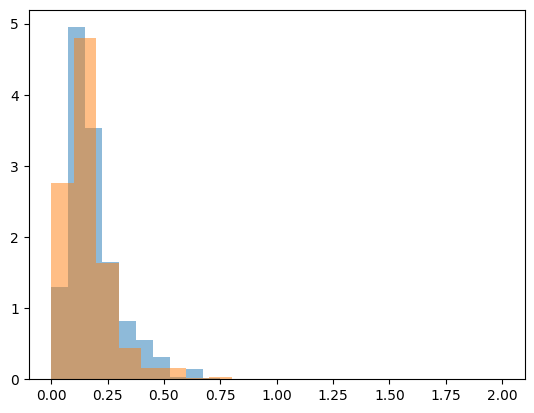

In [456]:



plt.hist(data[(data["type"]==0)]["signos_puntuacion/texto"], bins=20, density=True, alpha=0.5, label='0')
plt.hist(data[(data["type"]==1)]["signos_puntuacion/texto"], bins=20, density=True, alpha=0.5, label='1')




([<matplotlib.axis.XTick at 0x7fad16d079d0>,
 [Text(1, 0, 'Human'), Text(2, 0, 'LLM')])

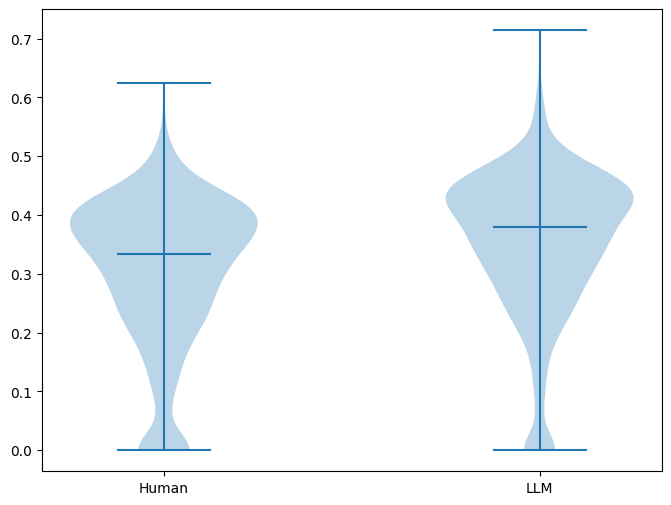

In [457]:
plt.figure(figsize=(8, 6))
plt.violinplot([data[(data["type"]==0)]["stop_words/texto"], data[(data["type"]==1)]["stop_words/texto"]], showmedians=True)
plt.xticks([1, 2], ['Human', 'LLM'])

In [458]:
#EDA
#Mayusculas
#Frequencia en palabras
#Puntuación



In [459]:
def procesar_texto(texto):
    tokens = word_tokenize(texto)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

data['texto_procesado'] = data['Texto'].apply(procesar_texto)

In [460]:
df_human=data[data["Clasificacion"]=="Human"]
df_llm=data[data["Clasificacion"]=="LLM"]






In [461]:
data

,Texto,Tipo de fuente,Clasificacion,type,stop_words/texto,numero_palabras_unicas/texto,signos_puntuacion/texto,palabras_mayusculas/texto,palabras_repetidas/texto,texto_procesado
0,El rey de los animales Se reunieron los animal...,Cuentos,Human,0,0.370892,0.376761,0.166667,0.110329,0.645540,rey animales reunieron animales monte elegir r...
1,Domingo 7 Había una vez dos compadres jorobado...,Cuentos,Human,0,0.411960,0.390365,0.104651,0.068937,0.629568,domingo vez dos compadres jorobados rico pobre...
2,Francisco El Hombre En los albores del siglo X...,Cuentos,Human,0,0.378271,0.441713,0.114195,0.082474,0.574148,francisco hombre albores siglo xx dos comercia...
3,Aminta Peláez- La leyenda de Wareke Hace muchí...,Cuentos,Human,0,0.432731,0.343373,0.128514,0.063253,0.675703,aminta leyenda wareke hace muchísimos años ini...
4,EL OASIS DE BELISSAMA ATLAUA pASeABA Con BeLis...,Cuentos,Human,0,0.376963,0.680628,0.094241,0.120419,0.392670,oasis belissama atlaua paseaba belissama ancia...
...,...,...,...,...,...,...,...,...,...,...
3833,la educación cívica es fundamental para la con...,Tweets,LLM,1,0.458333,0.791667,0.083333,0.000000,0.208333,educación cívica fundamental construcción soci...
3839,la corrupción es una amenaza para la democraci...,Tweets,LLM,1,0.461538,0.846154,0.076923,0.000000,0.153846,corrupción amenaza democracia desarrollo país ...
3841,el sistema político necesita una reforma profu...,Tweets,LLM,1,0.413793,0.793103,0.068966,0.000000,0.206897,sistema político necesita reforma profunda gar...
3844,la violencia y la delincuencia son una amenaza...,Tweets,LLM,1,0.500000,0.750000,0.062500,0.000000,0.250000,violencia delincuencia amenaza seguridad ciuda...


In [462]:
data["Texto"][0]

'El rey de los animales Se reunieron los animales del monte para elegir rey. Ya hacía días que el tigre y unos amigos venían diciendo que por qué gracia tenía que ser siempre el león, y que quién lo había elegido. Ese día, los animales fueron llegando y fueron diciendo por quién votaba cada uno. Ya por la tardecita, la votación estaba empatada: la mitá por el tigre y la mitá por el león. Se pusieron a ver qué animal faltaba por votar y el único era el conejo. Ahí mismito el tigre se voló ligerito y se fue a buscarlo a la cueva, donde vivía. Cuando llegó, lo encontró acostado. —¿Qué le pasa, Tío Conejo? ¿Cómo es que no ha venido a las elecciones, como están de buenas? —¡Qué va, Tío Tigre! Yo lo que estoy es muriéndome. Con una tontina y un desaliento… —¡Eso no quiere decir nada! Camine en un momentico vamos a votar. —Yo no voy, Tío Tigre. ¿Meterme esa caminada ahora, con este desaliento? El tigre se quedó como cavilando, y dijo: —Si es eso, Tío Conejo, camine yo lo llevo montado hasta a

In [463]:
data["Tipo de fuente"].unique()



array(['Cuentos', 'Ensayos', 'Fabulas', 'Noticias', 'Poemas', 'Tweets'],
      dtype=object)

In [464]:
data.columns

Index(['Texto', 'Tipo de fuente', 'Clasificacion', 'type', 'stop_words/texto',
       'numero_palabras_unicas/texto', 'signos_puntuacion/texto',
       'palabras_mayusculas/texto', 'palabras_repetidas/texto',
       'texto_procesado'],
      dtype='object')

<Axes: xlabel='numero_palabras_unicas/texto', ylabel='palabras_mayusculas/texto'>

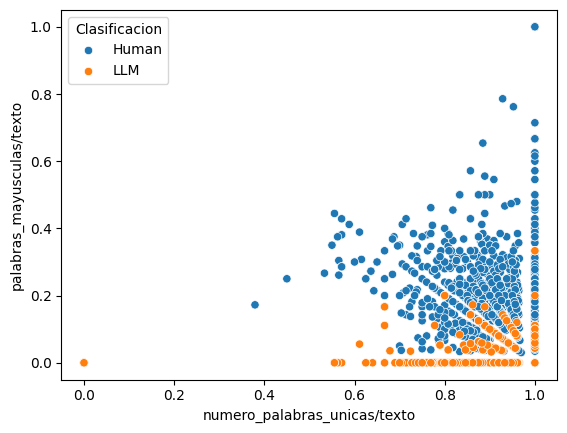

In [465]:
import seaborn as sns
sns.scatterplot(data=data[data["Tipo de fuente"]=="Tweets"], x="numero_palabras_unicas/texto", y='palabras_mayusculas/texto',hue='Clasificacion')

In [467]:
data.columns

Index(['Texto', 'Tipo de fuente', 'Clasificacion', 'type', 'stop_words/texto',
       'numero_palabras_unicas/texto', 'signos_puntuacion/texto',
       'palabras_mayusculas/texto', 'palabras_repetidas/texto',
       'texto_procesado'],
      dtype='object')

In [487]:
data['Tipo de fuente'].unique()

array(['Cuentos', 'Ensayos', 'Fabulas', 'Noticias', 'Poemas', 'Tweets'],
      dtype=object)

In [530]:
datos_interes=data[data['Tipo de fuente']=="Tweets"][['type','stop_words/texto','numero_palabras_unicas/texto','signos_puntuacion/texto','palabras_mayusculas/texto','palabras_repetidas/texto']]

In [531]:
datos_interes

,type,stop_words/texto,numero_palabras_unicas/texto,signos_puntuacion/texto,palabras_mayusculas/texto,palabras_repetidas/texto
554,0,0.388889,1.000000,0.055556,0.111111,0.000000
555,0,0.473684,0.894737,0.000000,0.157895,0.157895
556,0,0.380952,0.952381,0.000000,0.142857,0.047619
557,0,0.346154,0.923077,0.153846,0.076923,0.076923
558,0,0.473684,1.000000,0.052632,0.157895,0.052632
...,...,...,...,...,...,...
3833,1,0.458333,0.791667,0.083333,0.000000,0.208333
3839,1,0.461538,0.846154,0.076923,0.000000,0.153846
3841,1,0.413793,0.793103,0.068966,0.000000,0.206897
3844,1,0.500000,0.750000,0.062500,0.000000,0.250000


Accuracy: 0.944337811900192
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       279
           1       0.96      0.92      0.94       242

    accuracy                           0.94       521
   macro avg       0.95      0.94      0.94       521
weighted avg       0.94      0.94      0.94       521



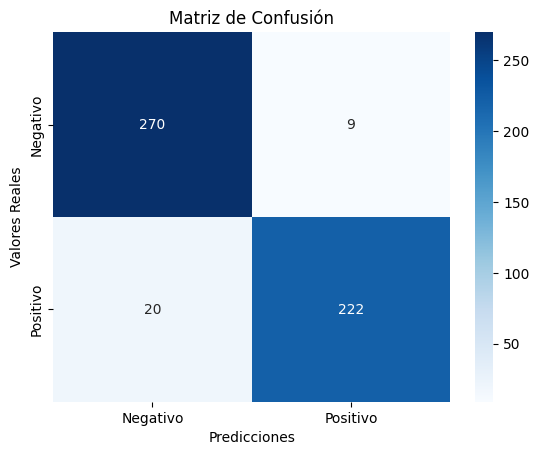

In [532]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar tu conjunto de datos (asegúrate de que tenga columnas de características y una columna de etiquetas)
# Por ejemplo, supongamos que tienes un archivo CSV llamado 'dataset.csv'


# Separar las características (X) de las etiquetas (y)
X = datos_interes.drop('type', axis=1)  # Ajusta 'etiqueta' al nombre de tu columna de etiquetas
y = datos_interes['type']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características para mejorar el rendimiento de la SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el clasificador SVM
svm_classifier = SVC(kernel='linear', C=1.0)  # Puedes ajustar el tipo de kernel y otros parámetros

# Entrenar el modelo SVM
svm_classifier.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()



In [533]:
texto_ejemplo_poema="En la penumbra de la noche sosegada, donde las estrellas sus secretos revelan, mi mente vuela en alas de la nada, donde los sueños como luciérnagas destellan.Bajo el manto plateado de la luna, se tejen historias en el silencio, donde el corazón, como una fortuna, se llena de anhelos en este trance eterno.Susurros de hojas danzan con el viento, mientras la noche abraza el suspenso, y en el lienzo del cielo, un firmamento, pintado con los sueños que llevo dentro.Allí, donde los recuerdos se entrelazan, y las sombras danzan con la melodía, se despiertan los sueños que abrazan, la esperanza en esta mágica poesía.Que las estrellas guarden mis secretos, y la luna cuente mis anhelos, en este rincón de sueños discretos, donde la noche se convierte en cielo."

In [534]:
def extraccion_caracteristicas(text):
    data=pd.DataFrame(index=[1])
    data["stop_words/texto"]=numero_stop_words_por_texto(text)
    data["numero_palabras_unicas/texto"]=numero_palabras_unicas_por_texto(text)
    data["signos_puntuacion/texto"]=signos_puntuacion_por_texto(text)
    data["palabras_mayusculas/texto"]=palabras_mayusculas_por_texto(text)
    data["palabras_mayusculas/texto"]=palabras_mayusculas_por_texto(text)
    data["palabras_repetidas/texto"]=palabras_repetidas_por_texto(text)
    datos=scaler.transform(data[['stop_words/texto','numero_palabras_unicas/texto','signos_puntuacion/texto','palabras_mayusculas/texto','palabras_repetidas/texto']])
    return datos

In [535]:
def predict_text(text):
    caracteristicas=extraccion_caracteristicas(text)
    pred=svm_classifier.predict(caracteristicas)
    if pred[0]==0:
        clase="Humano"
    else:
        clase="LLM"
    return clase

In [536]:
predict_text(texto_ejemplo_poema)

'LLM'